In [27]:
from pathlib import Path
import pandas as pd 

train_data = pd.read_csv('store sales/train.csv')

train_data['date'] = pd.to_datetime(train_data['date'])
pd.set_option('display.max_rows', 10)
display(train_data)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [28]:
train_data = train_data.set_index(['store_nbr', 'family', 'date']).sort_index()

# Returns the data associated with a specific store and product family from the dataframe df. 
def cross_section(df, store_nbr,family):
    specific_store_data = df.xs(key=(store_nbr, family), level=('store_nbr', 'family'))
    return(specific_store_data)


In [29]:
store3_deli = cross_section(train_data, 3, "DELI")

display(store3_deli)

,id,sales,onpromotion
date,,,
2013-01-01,735,0.000,0
2013-01-02,2517,600.273,0
2013-01-03,4299,421.195,0
2013-01-04,6081,347.192,0
2013-01-05,7863,594.503,0
...,...,...,...
2017-08-11,2992713,416.172,67
2017-08-12,2994495,355.900,8
2017-08-13,2996277,395.272,8


In [30]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
    
def my_plot(title, s, my_color,line_width):
    # Set the style
    sns.set_style("whitegrid")
    
    # Create the plot
    plt.figure(figsize=(7, 5))
    sns.lineplot(data=s, color=my_color, linewidth=line_width, linestyle='-')
    
    # Customize labels and title
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.title(title, fontsize=14)
    
    # Customize tick labels
    plt.xticks(rotation=45, fontsize=10)  
    plt.yticks(fontsize=10)
    
    # Set the major locator for x-axis ticks every year
    plt.gca().xaxis.set_major_locator(YearLocator())
    
    # Show the plot
    plt.tight_layout()
    plt.show()

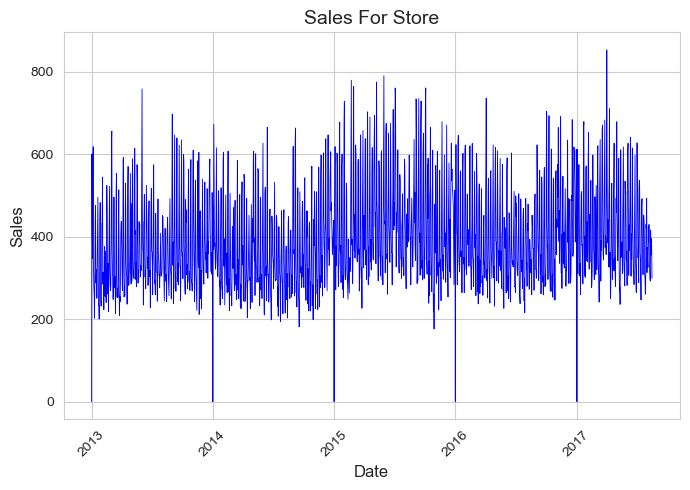

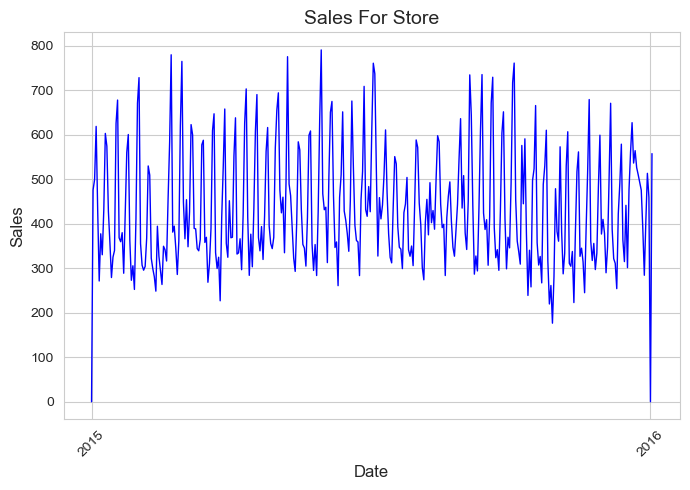

In [32]:
store3_deli_sales = store3_deli["sales"]

my_plot('Sales For Store',store3_deli_sales,'blue',0.6)
my_plot('Sales For Store',store3_deli_sales['2015-01-01':'2016-01-02'], 'blue',1)

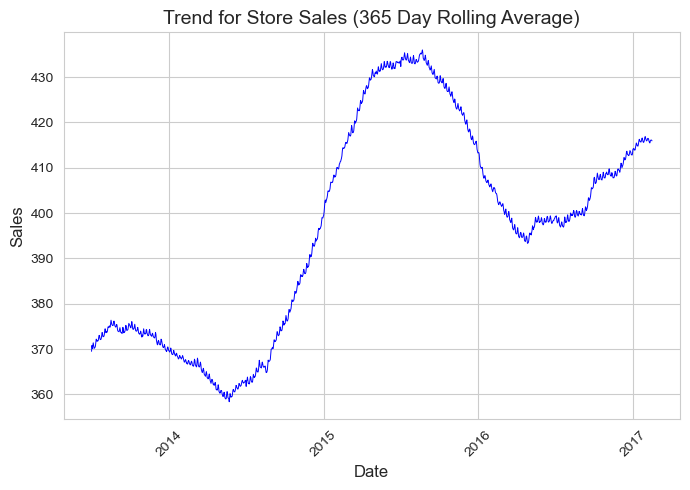

In [35]:
trend = store3_deli_sales.rolling(window= 365, center = True).mean()
my_plot('Trend for Store Sales (365 Day Rolling Average)', trend, "blue",0.7)

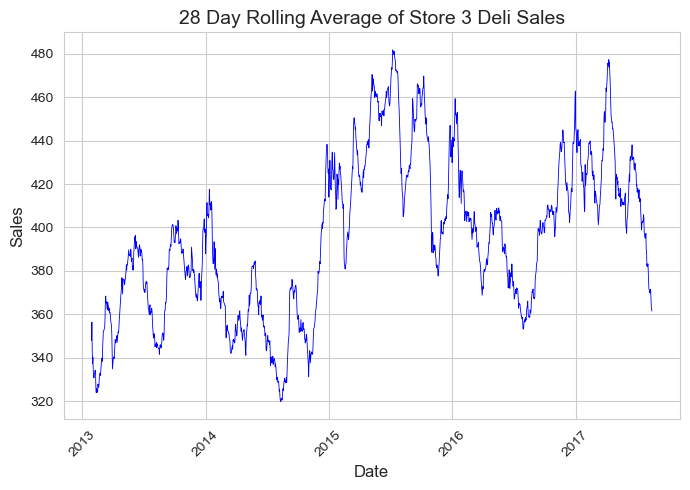

In [33]:
##### Calculate the 28-day rolling average
rolling_avg = store3_deli_sales.rolling(window=28).mean()
my_plot('28 Day Rolling Average of Store 3 Deli Sales',rolling_avg, 'blue',0.6)

In [8]:
stores = pd.read_csv('store sales/stores.csv')

# returns the type of the Favorita store defined by store_nbr
def to_store_type(store_nbr):
    store_type = stores["type"].iloc[store_nbr-1]
    return(store_type)

# chooses the color to plot based on the store type.     
def to_color(store_type):
    if store_type == "A":
        return('green')
    if store_type == "B":
        return('purple')
    if store_type == "C":
        return('orange')
    if store_type == "D":
        return('skyblue')
    if store_type == "E":
        return('brown')
    
# plots a variety of rolling averages for the data pertaining to store_nbr and family. Colors the plot based on the stores' type. 
def summary(df, store_nbr, family):
    store_color = to_color(to_store_type(store_nbr))
    
    specific_store_product_sales = cross_section(train_data, store_nbr, family)['sales']
    my_plot(f'{family} Sales For Store {store_nbr}',specific_store_product_sales, store_color,0.5)
    my_plot(f'{family} Sales For Store {store_nbr} Zoomed',specific_store_product_sales['2015-01-01':'2016-01-02'], store_color,1)
    
    # Calculate the 28-day rolling average
    rolling_avg = specific_store_product_sales.rolling(window=28).mean()
    my_plot(f'28 Day Rolling Average of Store {store_nbr} {family} Sales',rolling_avg, store_color,0.6)
    
    trend = specific_store_product_sales.rolling(window= 365).mean()
    my_plot(f'Trend for Store {store_nbr} {family} Sales (365 Day Rolling Averge)', trend, store_color,0.7)

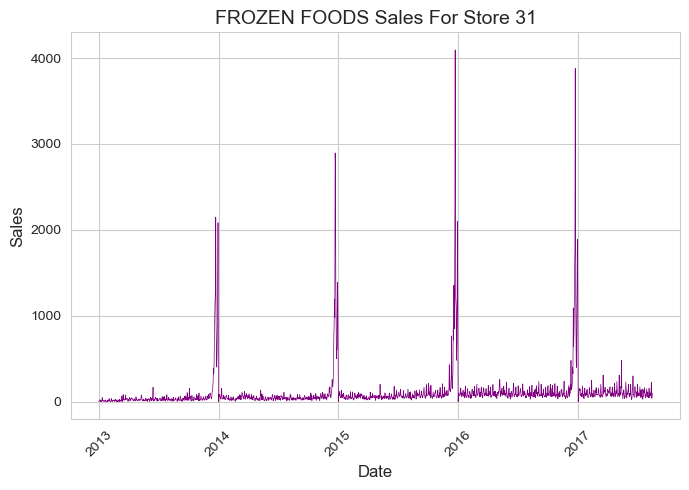

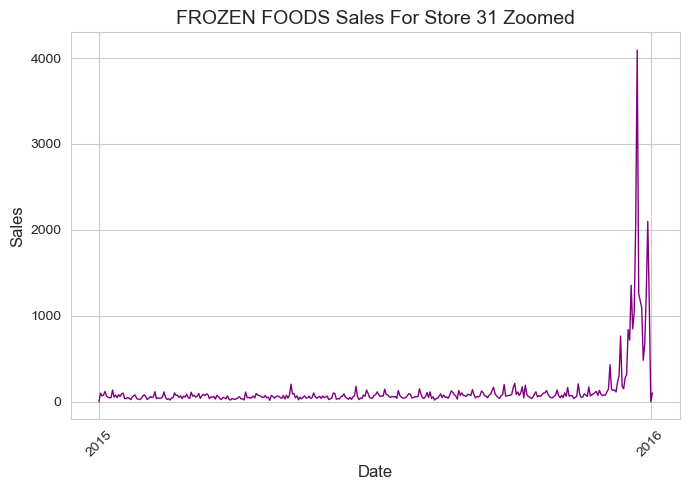

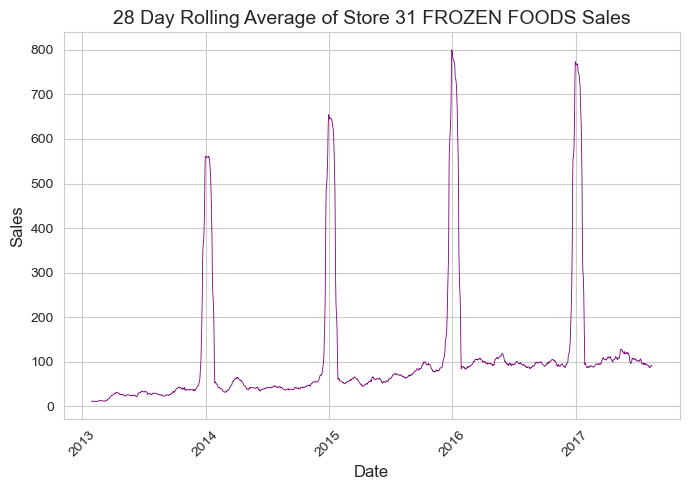

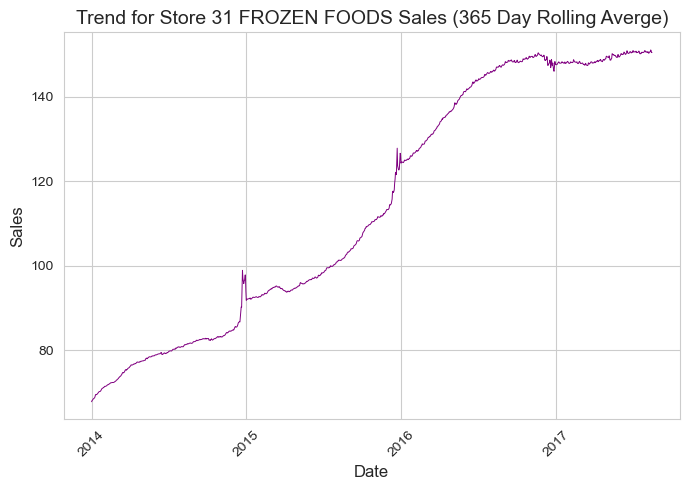

In [10]:
summary(train_data, 31, "FROZEN FOODS")

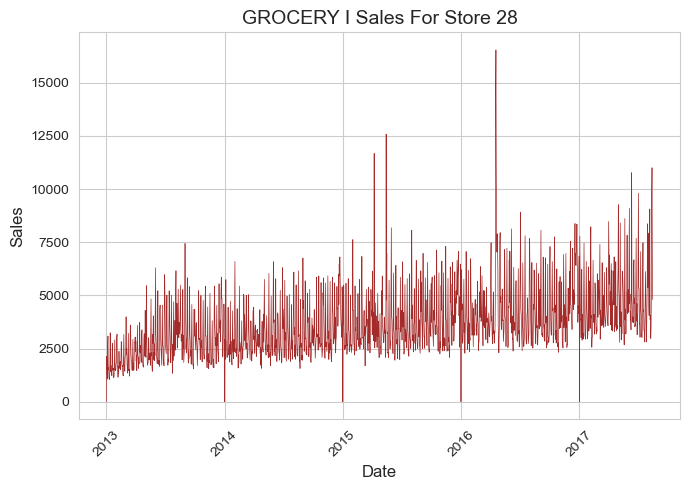

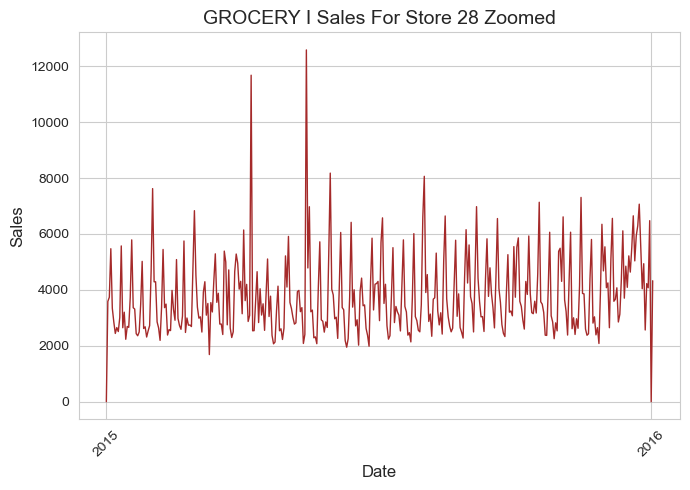

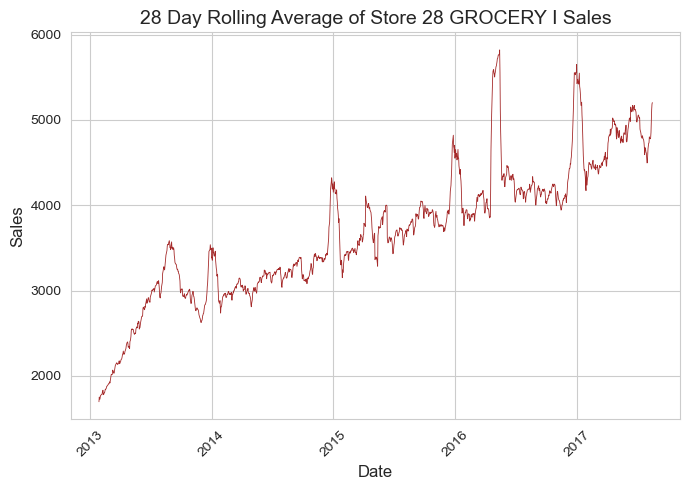

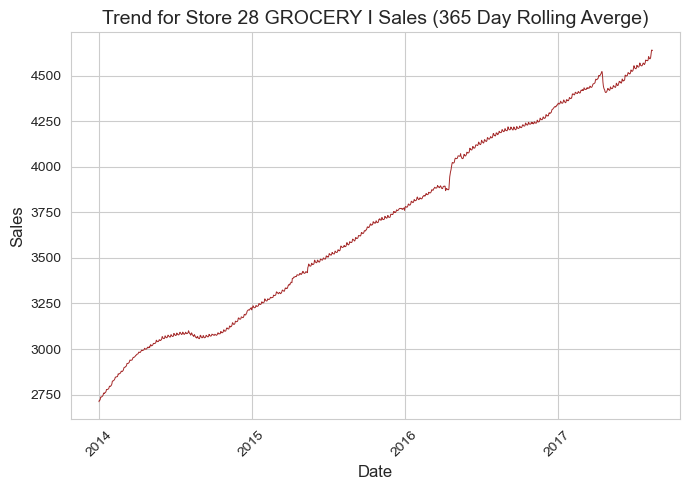

In [9]:
summary(train_data, 28,"GROCERY I")

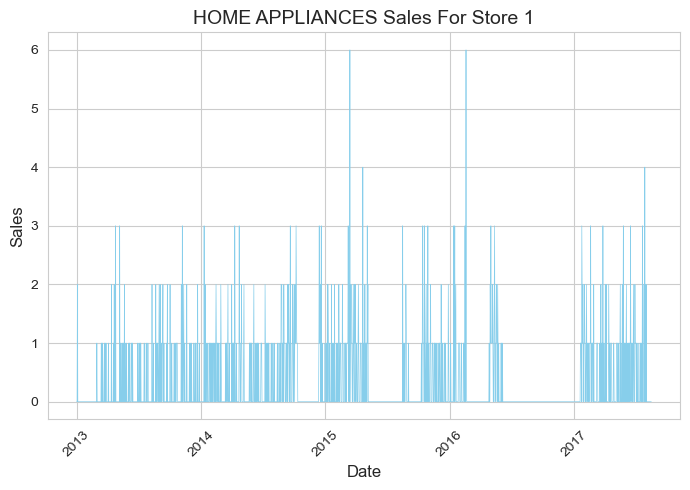

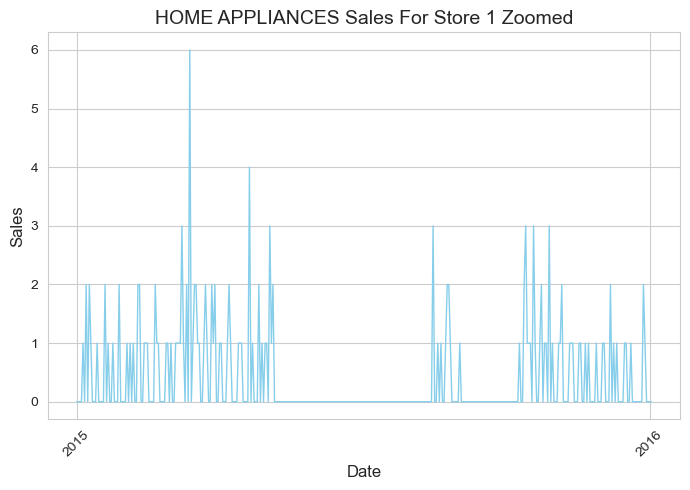

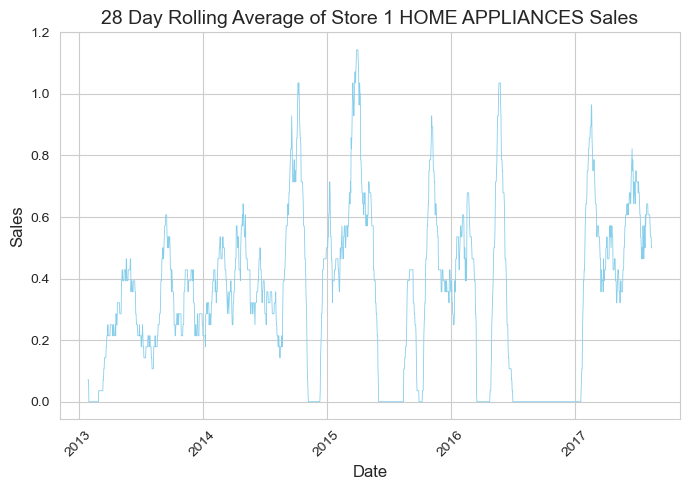

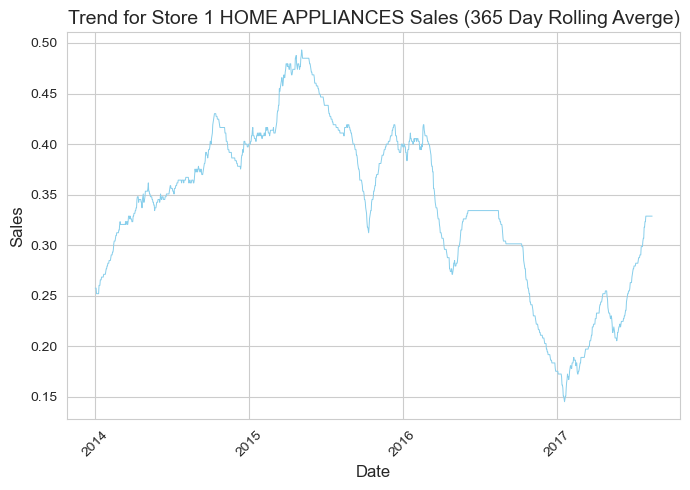

In [11]:
summary(train_data, 1, "HOME APPLIANCES")

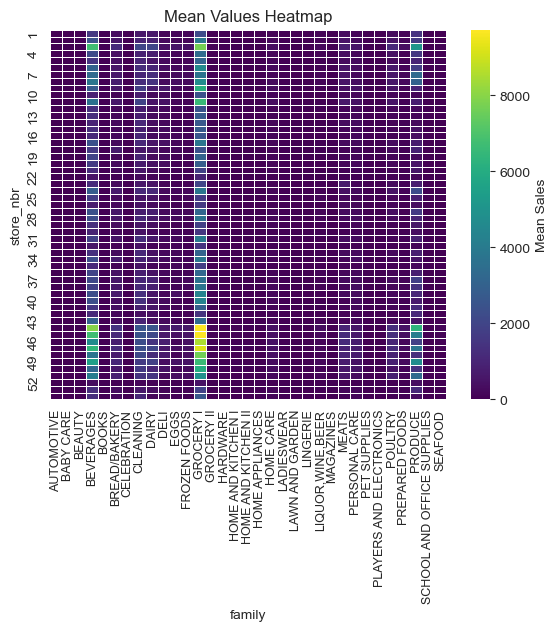

In [12]:
# Group by and calculate mean
grouped_mean = train_data.groupby(['store_nbr', 'family']).mean()

# Pivot the table
heatmap_data = grouped_mean.pivot_table(index='store_nbr', columns='family', values='sales')

# Create a heatmap using seaborn
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".1f", linewidths=.5, xticklabels=True, cbar_kws={'label': 'Mean Sales'})
plt.title('Mean Values Heatmap')
plt.xticks(fontsize=9)
plt.show()

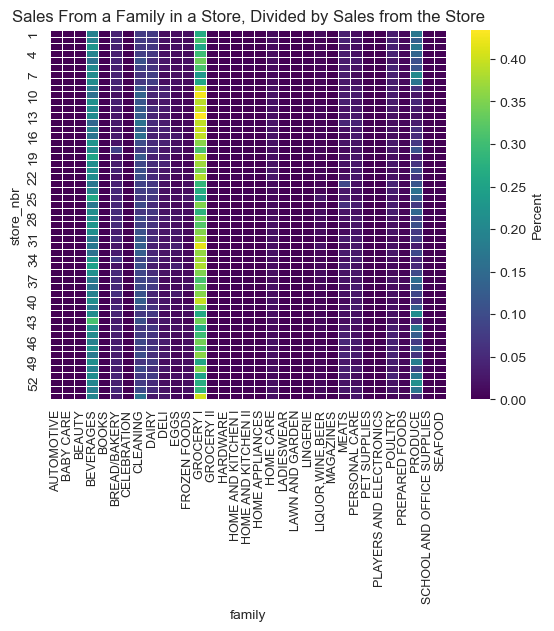

In [13]:
from copy import copy

grouped_sum = train_data.groupby(['store_nbr', 'family']).sum()
grouped_store_sum = train_data.groupby(['store_nbr']).sum()
grouped_family_distribution = copy(grouped_sum)
grouped_family_distribution['sales'] = grouped_sum['sales'] / grouped_store_sum['sales']

# Pivot the table
heatmap_data = grouped_family_distribution.pivot_table(index='store_nbr', columns='family', values='sales')

# Create a heatmap using seaborn
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".1f", linewidths=.5, xticklabels=True, cbar_kws={'label': 'Percent'})
plt.title("Sales From a Family in a Store, Divided by Sales from the Store")
plt.xticks(fontsize=9)
plt.show()

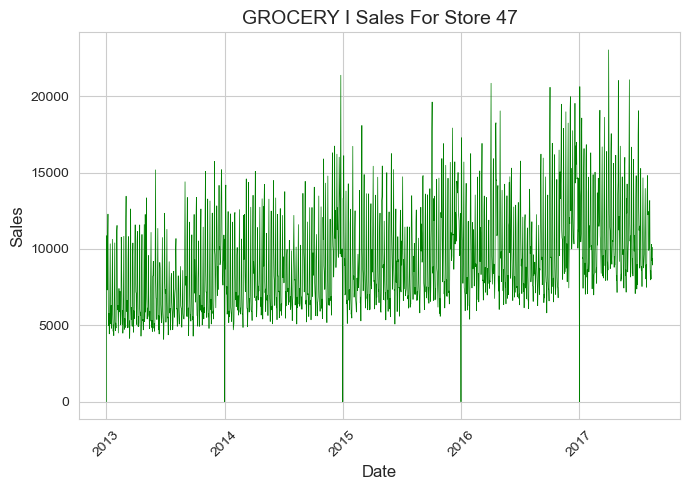

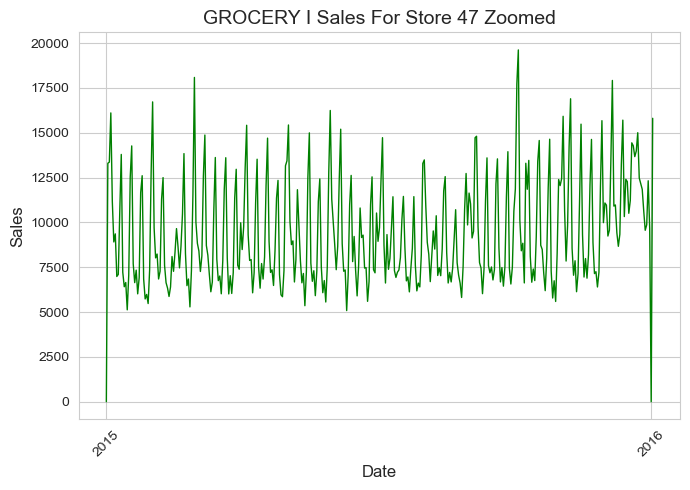

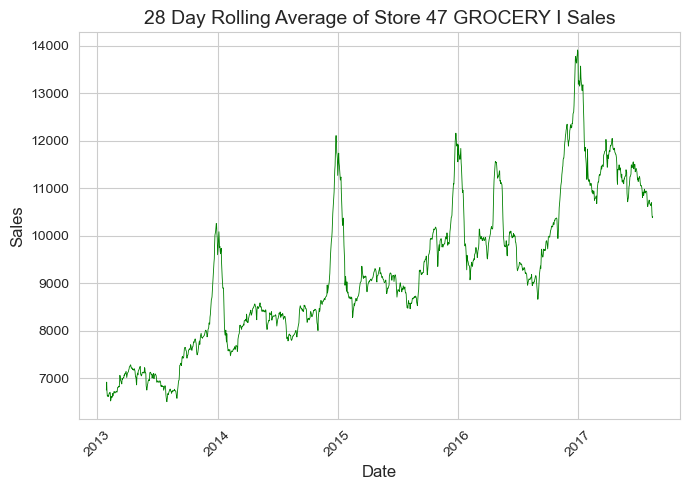

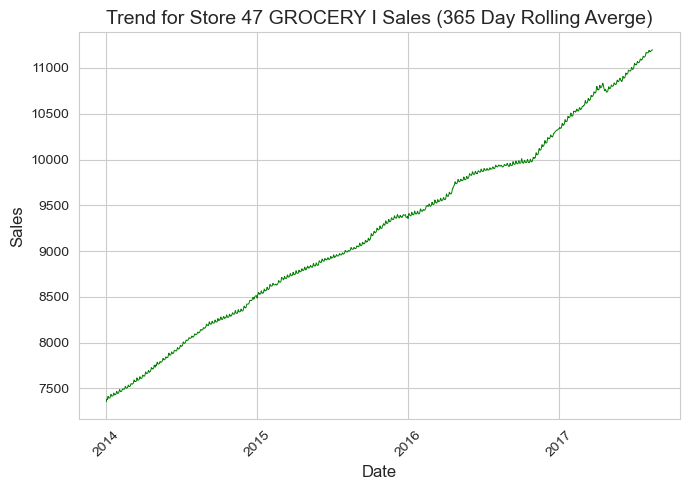

In [14]:
summary(train_data, 47,"GROCERY I")

## Building a Model Using Linear Regression  <a class="anchor"  id="chapter4"></a>



In [15]:
store47_groceryI = cross_section(train_data, 47, "GROCERY I")

display(store47_groceryI)

,id,sales,onpromotion
date,,,
2013-01-01,1365,0.0,0
2013-01-02,3147,10867.0,0
2013-01-03,4929,7325.0,0
2013-01-04,6711,7317.0,0
2013-01-05,8493,10567.0,0
...,...,...,...
2017-08-11,2993343,10297.0,42
2017-08-12,2995125,9258.0,40
2017-08-13,2996907,10110.0,37


In [16]:
store47_groceryI['day_of_week'] = store47_groceryI.index.day_name()
store47_groceryI['month_of_year'] = store47_groceryI.index.month_name()

display(store47_groceryI)

,id,sales,onpromotion,day_of_week,month_of_year
date,,,,,
2013-01-01,1365,0.0,0,Tuesday,January
2013-01-02,3147,10867.0,0,Wednesday,January
2013-01-03,4929,7325.0,0,Thursday,January
2013-01-04,6711,7317.0,0,Friday,January
2013-01-05,8493,10567.0,0,Saturday,January
...,...,...,...,...,...
2017-08-11,2993343,10297.0,42,Friday,August
2017-08-12,2995125,9258.0,40,Saturday,August
2017-08-13,2996907,10110.0,37,Sunday,August


In [17]:
store47_groceryI = pd.get_dummies(store47_groceryI, columns = ['day_of_week', 'month_of_year'],dtype = int, prefix = "is")

pd.set_option('display.max_columns', 10)
display(store47_groceryI)

,id,sales,onpromotion,is_Friday,is_Monday,...,is_March,is_May,is_November,is_October,is_September
date,,,,,,,,,,,
2013-01-01,1365,0.0,0,0,0,...,0,0,0,0,0
2013-01-02,3147,10867.0,0,0,0,...,0,0,0,0,0
2013-01-03,4929,7325.0,0,0,0,...,0,0,0,0,0
2013-01-04,6711,7317.0,0,1,0,...,0,0,0,0,0
2013-01-05,8493,10567.0,0,0,0,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,2993343,10297.0,42,1,0,...,0,0,0,0,0
2017-08-12,2995125,9258.0,40,0,0,...,0,0,0,0,0
2017-08-13,2996907,10110.0,37,0,0,...,0,0,0,0,0


In [18]:
# accepts a series whose values represent dates. Returns a new series which has its values replaced by 0's and 1's depending on weather or not the date 
# values were new years day or not
def is_newyears(date_series):
    return ((date_series.dt.day == 1) & (date_series.dt.month == 1)).astype(int)

# works the sames as is_newyears, but adds 1's for days which are Christmas
def is_christmas(date_series):
    return ((date_series.dt.day >= 10) & (date_series.dt.month == 12)).astype(int)

# works the sames as is_newyears, but adds 1's for days which are May first.
def is_may_first(date_series):
    return ((date_series.dt.day == 1) & (date_series.dt.month == 5)).astype(int)

# accepts a series whose values represent dates. Returns a new series which has its values replaced by 0's and 1's depending on weather or not the date 
# values are close to the Earthquake on "04-16-2016".
def is_earthquake(date_series):
    day_of_earthquake = "04-16-2016"
    return ((date_series >= pd.to_datetime(day_of_earthquake)) & (date_series < pd.to_datetime("05-07-2016"))).astype(int)

In [19]:
# creating one hot features that account for holidays
store47_groceryI['is_christmas'] = is_christmas(pd.Series(store47_groceryI.index,index = store47_groceryI.index))
store47_groceryI["is_earthquake"] = is_earthquake(pd.Series(store47_groceryI.index,index = store47_groceryI.index))
store47_groceryI["is_newyears"] = is_newyears(pd.Series(store47_groceryI.index,index = store47_groceryI.index))
store47_groceryI["is_may_first"] = is_may_first(pd.Series(store47_groceryI.index,index = store47_groceryI.index))


pd.set_option('display.max_columns', 15)
display(store47_groceryI) 

,id,sales,onpromotion,is_Friday,is_Monday,is_Saturday,is_Sunday,...,is_November,is_October,is_September,is_christmas,is_earthquake,is_newyears,is_may_first
date,,,,,,,,,,,,,,,
2013-01-01,1365,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0
2013-01-02,3147,10867.0,0,0,0,0,0,...,0,0,0,0,0,0,0
2013-01-03,4929,7325.0,0,0,0,0,0,...,0,0,0,0,0,0,0
2013-01-04,6711,7317.0,0,1,0,0,0,...,0,0,0,0,0,0,0
2013-01-05,8493,10567.0,0,0,0,1,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,2993343,10297.0,42,1,0,0,0,...,0,0,0,0,0,0,0
2017-08-12,2995125,9258.0,40,0,0,1,0,...,0,0,0,0,0,0,0
2017-08-13,2996907,10110.0,37,0,0,0,1,...,0,0,0,0,0,0,0


In [20]:
store47_groceryI["time"] = (store47_groceryI.index - pd.to_datetime("2013-01-01")).days

display(store47_groceryI)

,id,sales,onpromotion,is_Friday,is_Monday,is_Saturday,is_Sunday,...,is_October,is_September,is_christmas,is_earthquake,is_newyears,is_may_first,time
date,,,,,,,,,,,,,,,
2013-01-01,1365,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0
2013-01-02,3147,10867.0,0,0,0,0,0,...,0,0,0,0,0,0,1
2013-01-03,4929,7325.0,0,0,0,0,0,...,0,0,0,0,0,0,2
2013-01-04,6711,7317.0,0,1,0,0,0,...,0,0,0,0,0,0,3
2013-01-05,8493,10567.0,0,0,0,1,0,...,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,2993343,10297.0,42,1,0,0,0,...,0,0,0,0,0,0,1683
2017-08-12,2995125,9258.0,40,0,0,1,0,...,0,0,0,0,0,0,1684
2017-08-13,2996907,10110.0,37,0,0,0,1,...,0,0,0,0,0,0,1685


<span style="font-size: 14pt; font-family: 'Circular';">
    
    
  

In [21]:
# our target 
y = store47_groceryI["sales"]
# dropping target from training data
X = store47_groceryI.drop(columns = ['sales'])

split_date = pd.to_datetime('2016-01-01')
X_train = X[:split_date]
X_val = X[split_date:]
y_train = y[:split_date]
y_val = y[split_date:]

In [22]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# the values which our model has forecasted into the future.
y_pred = lr_model.predict(X_val)
y_pred = pd.Series(y_pred, index = y_val.index)
# we also store the sales values which our model has estimated over the dates corresponding to the training data.
y_fit = lr_model.predict(X_train)
y_fit = pd.Series(y_fit, index = y_train.index)

### <span id = "visualizing-and-testing-our-model" style="color:#696969;font-size: 17pt;">Visualizing and Testing Our Model</span>


In [24]:
from datetime import timedelta
import numpy as np

# a measure of the difference between two vectors/series y_true and y_pred. Stands for Root Mean Squared Logarithmic Error
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred), "Length of y_true and y_pred must be the same."
    # Convert to numpy arrays to handle numerical operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute RMSLE
    rmsle = np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))
    return rmsle

# accepts a series s and returns a new series with all of its negative values replaced by zeros. Used to avoid undefined values within the log of rmsle
def negative_to_zero(s):
    s = s.copy()
    s[s < 0] = 0
    return(s)

# Plots the series y and the forecasted and fitted values stored in the series y_fit and y_pred generated by a model. 
# Assumes there has been atleast six months of training data.
def forecast_summary(y,y_fit,y_pred, y_color,title):
    # Set the style
    sns.set_style("whitegrid")
    
    # Create the plot
    plt.figure(figsize=(10, 7))
    # plot y
    sns.lineplot(data=y, color=y_color, linewidth=0.5, linestyle='-', label='Actual Values')
    # plot y_fit
    sns.lineplot(data=y_fit, color='blue', linewidth=0.5, linestyle='-',label='Fitted Values')
     # plot y_pred
    sns.lineplot(data=y_pred, color='red', linewidth=0.5, linestyle='-',label='Forecasted Values')
    
    # Customize labels and title
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.title(title, fontsize=14)
    
    # Customize tick labels
    plt.xticks(rotation=45, fontsize=10)  
    plt.yticks(fontsize=10)
    
    # Set the major locator for x-axis ticks every year
    plt.gca().xaxis.set_major_locator(YearLocator())
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # create second plot
    plt.figure(figsize=(12, 9))

    start_date = y_fit.index.max()- timedelta(days=6*30)
    end_date = y_pred.index.min() + timedelta(days=375)
    
    sns.lineplot(data=y[start_date:end_date], color=y_color, linewidth=1.4, linestyle='-',label='Actual Values')
    sns.lineplot(data=y_fit[start_date:], color='blue', linewidth=0.8, linestyle='-',label='Fitted Values')
    sns.lineplot(data=y_pred[:end_date] , color='red', linewidth=0.8, linestyle='-',label='Forecasted Values')
    
    # Customize labels and title
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.title(f'{title} Zoomed', fontsize=14)

    # Customize tick labels
    plt.xticks(rotation=45, fontsize=10)  
    plt.yticks(fontsize=10)
    
    # Set the major locator for x-axis ticks every year
    plt.gca().xaxis.set_major_locator(YearLocator())
    
    # Show the legend
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # calculating relevant errors:
    fitted_error = rmsle(y[:y_fit.index.max()],negative_to_zero(y_fit))
    forecasted_error = rmsle(y[y_pred.index.min():],negative_to_zero(y_pred))
    
    print("RMSLE for fitted values:", fitted_error)
    print("RMSLE for forecasted values:", forecasted_error)

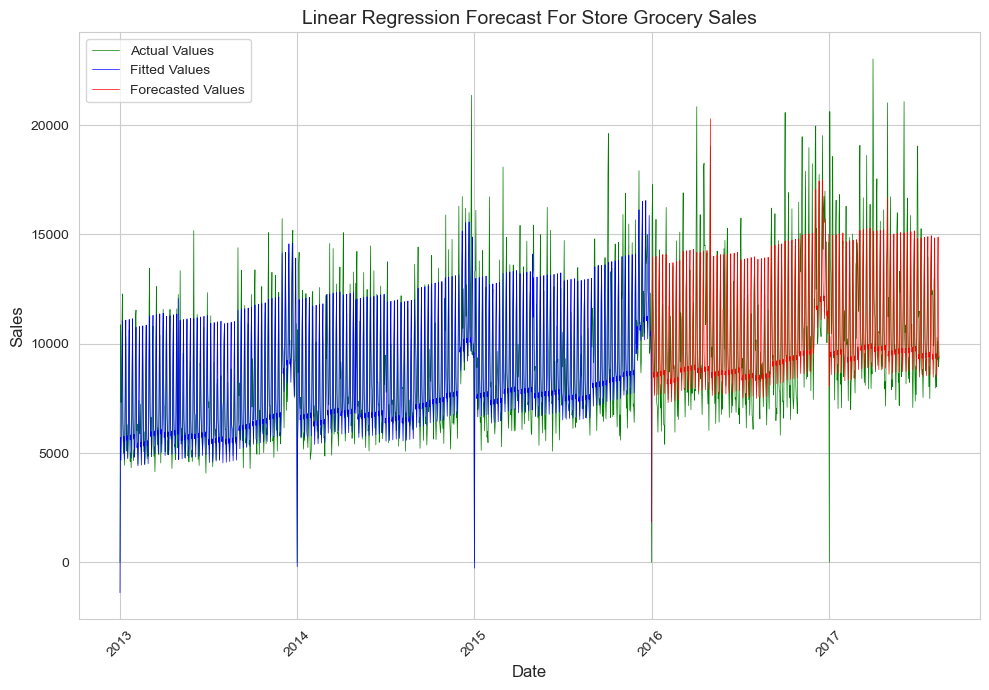

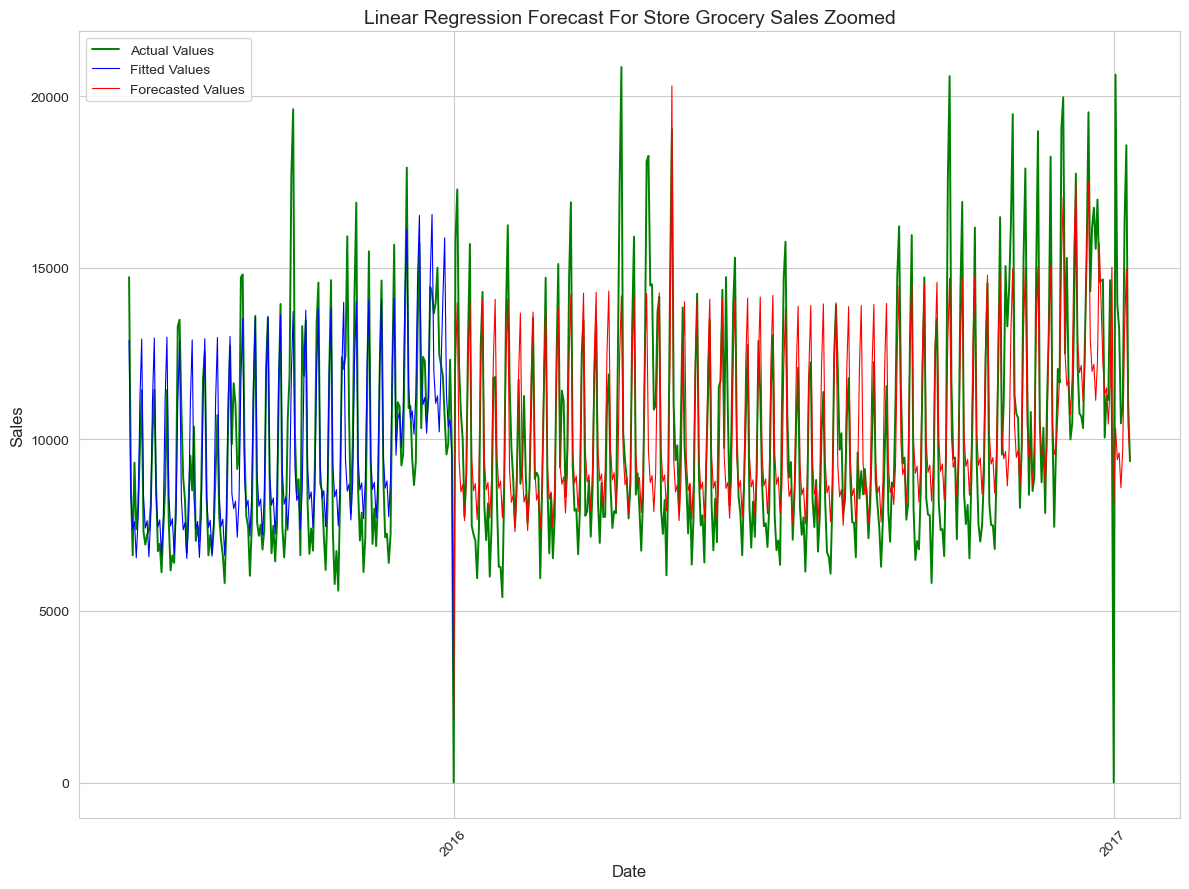

RMSLE for fitted values: 0.2738816700920668
RMSLE for forecasted values: 0.5092925580831454


In [25]:
forecast_summary(y,y_fit,y_pred, "green","Linear Regression Forecast For Store Grocery Sales")